<a href="https://colab.research.google.com/github/anika253/-ABOUT_ME/blob/main/Lab02_2025_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🎯 Gradient Descent MNIST Digit-3 Classification Experiment
📥 Loading MNIST dataset...
✅ Data loaded: 4000 training samples, 1000 test samples
📊 Class distribution: 409 digit-3s, 3591 non-3s

📸 SAMPLE DIGITS FROM DATASET


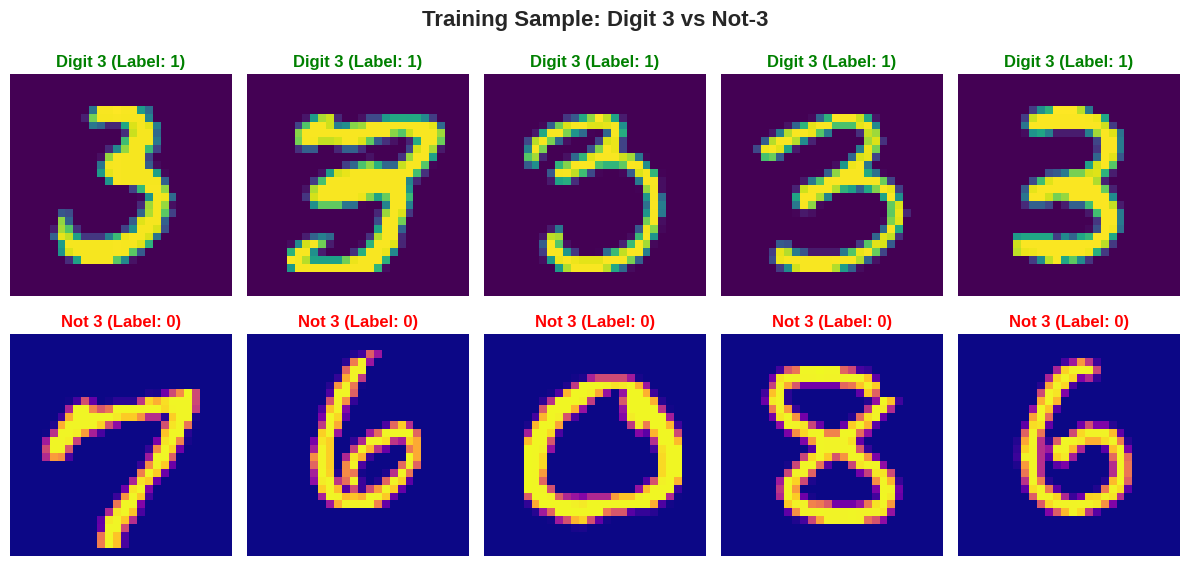


🧪 GRADIENT DESCENT EXPERIMENTS
Training models with different learning rates...

🎯 LEARNING RATE: 0.001
🚀 Starting training with learning rate: 0.001
Iteration   0: Cost = 0.6953, Accuracy = 0.4898
Iteration  20: Cost = 0.6020, Accuracy = 0.8972
Iteration  40: Cost = 0.5377, Accuracy = 0.8978
Iteration  60: Cost = 0.4924, Accuracy = 0.8978
Iteration  80: Cost = 0.4595, Accuracy = 0.8978
Iteration 100: Cost = 0.4351, Accuracy = 0.8978
Iteration 120: Cost = 0.4165, Accuracy = 0.8978
Iteration 140: Cost = 0.4020, Accuracy = 0.8978
Iteration 160: Cost = 0.3904, Accuracy = 0.8978
Iteration 180: Cost = 0.3809, Accuracy = 0.8978
Iteration 200: Cost = 0.3731, Accuracy = 0.8978
Iteration 220: Cost = 0.3664, Accuracy = 0.8978
Iteration 240: Cost = 0.3607, Accuracy = 0.8978
Iteration 260: Cost = 0.3558, Accuracy = 0.8978
Iteration 280: Cost = 0.3514, Accuracy = 0.8978
Iteration 300: Cost = 0.3475, Accuracy = 0.8978
Iteration 320: Cost = 0.3440, Accuracy = 0.8978
Iteration 340: Cost = 0.3408, Acc

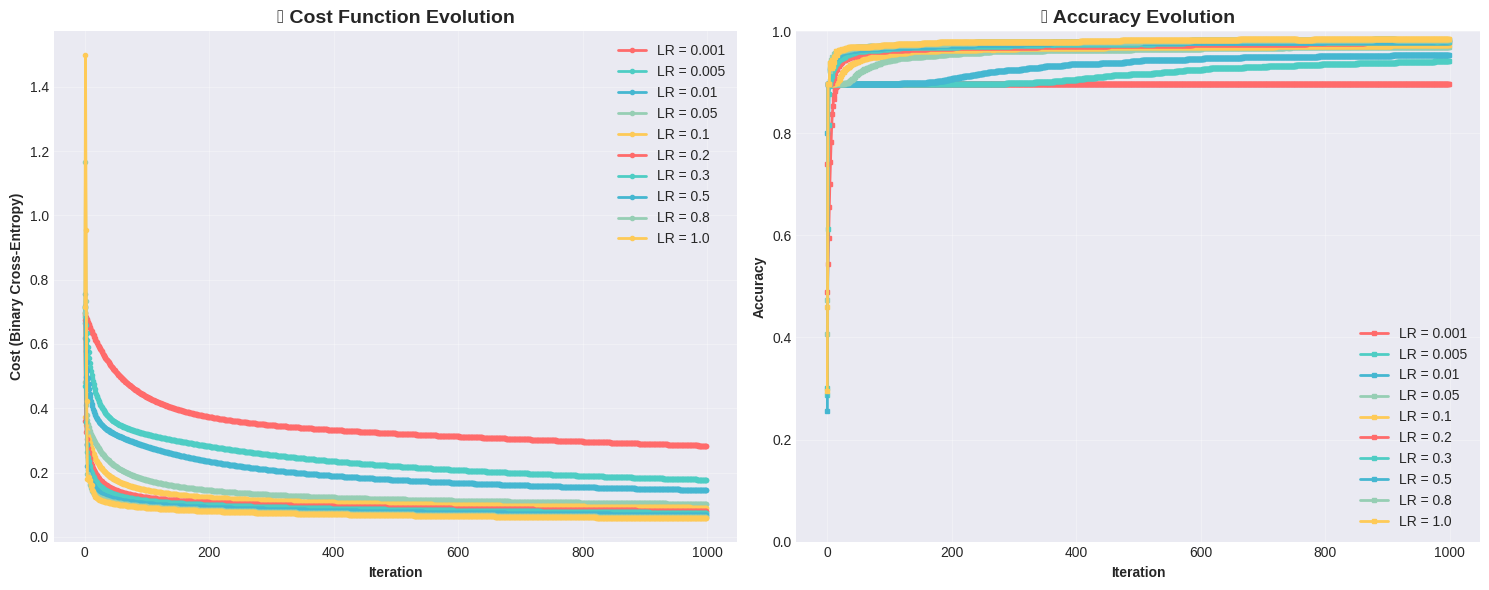


🔍 Detailed Analysis of Best Model (LR = 0.01)


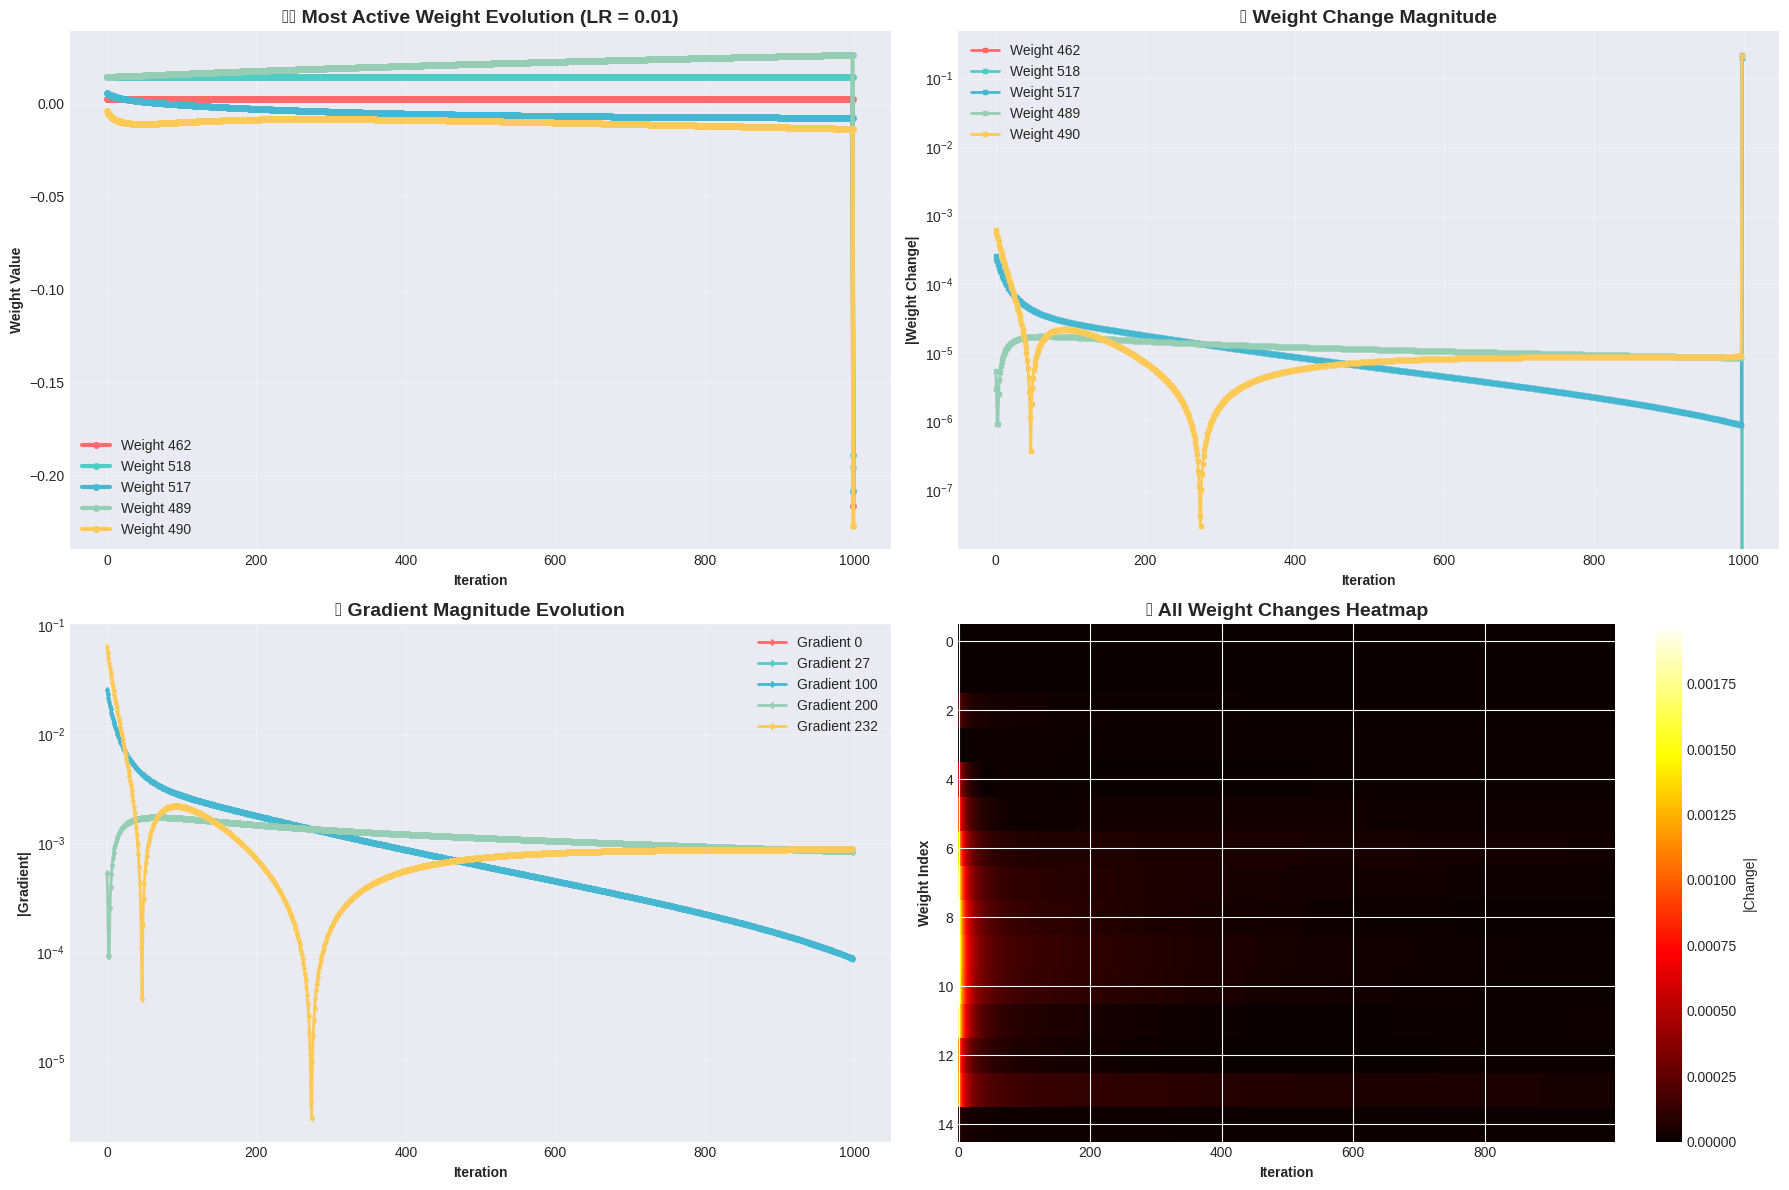

📊 Weight Statistics:
   • Total weight change: 0.617097
   • Maximum single weight change: 0.097061
   • Average weight magnitude: 0.045211

🧠 Learned Weight Visualization


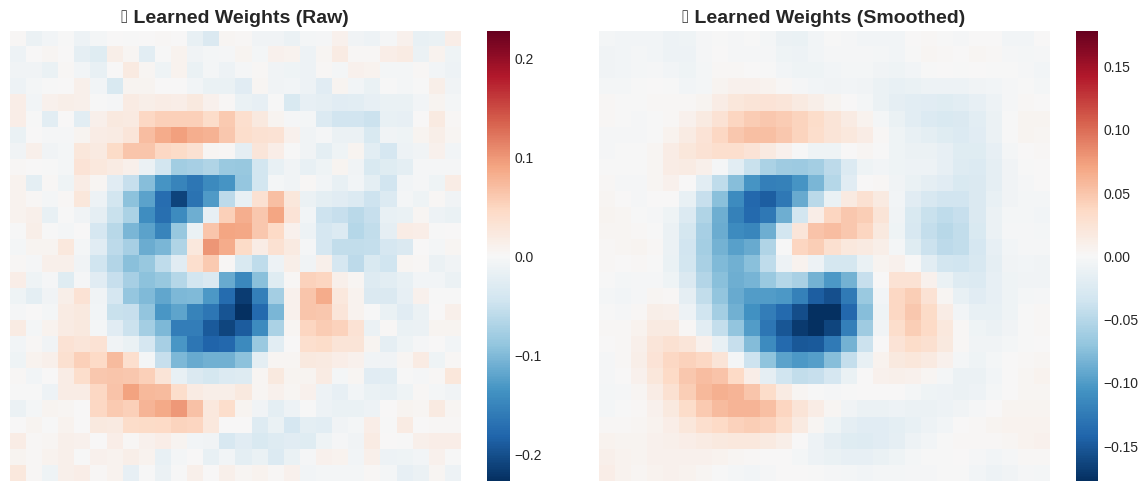


🔍 WEIGHT IMPORTANCE ANALYSIS


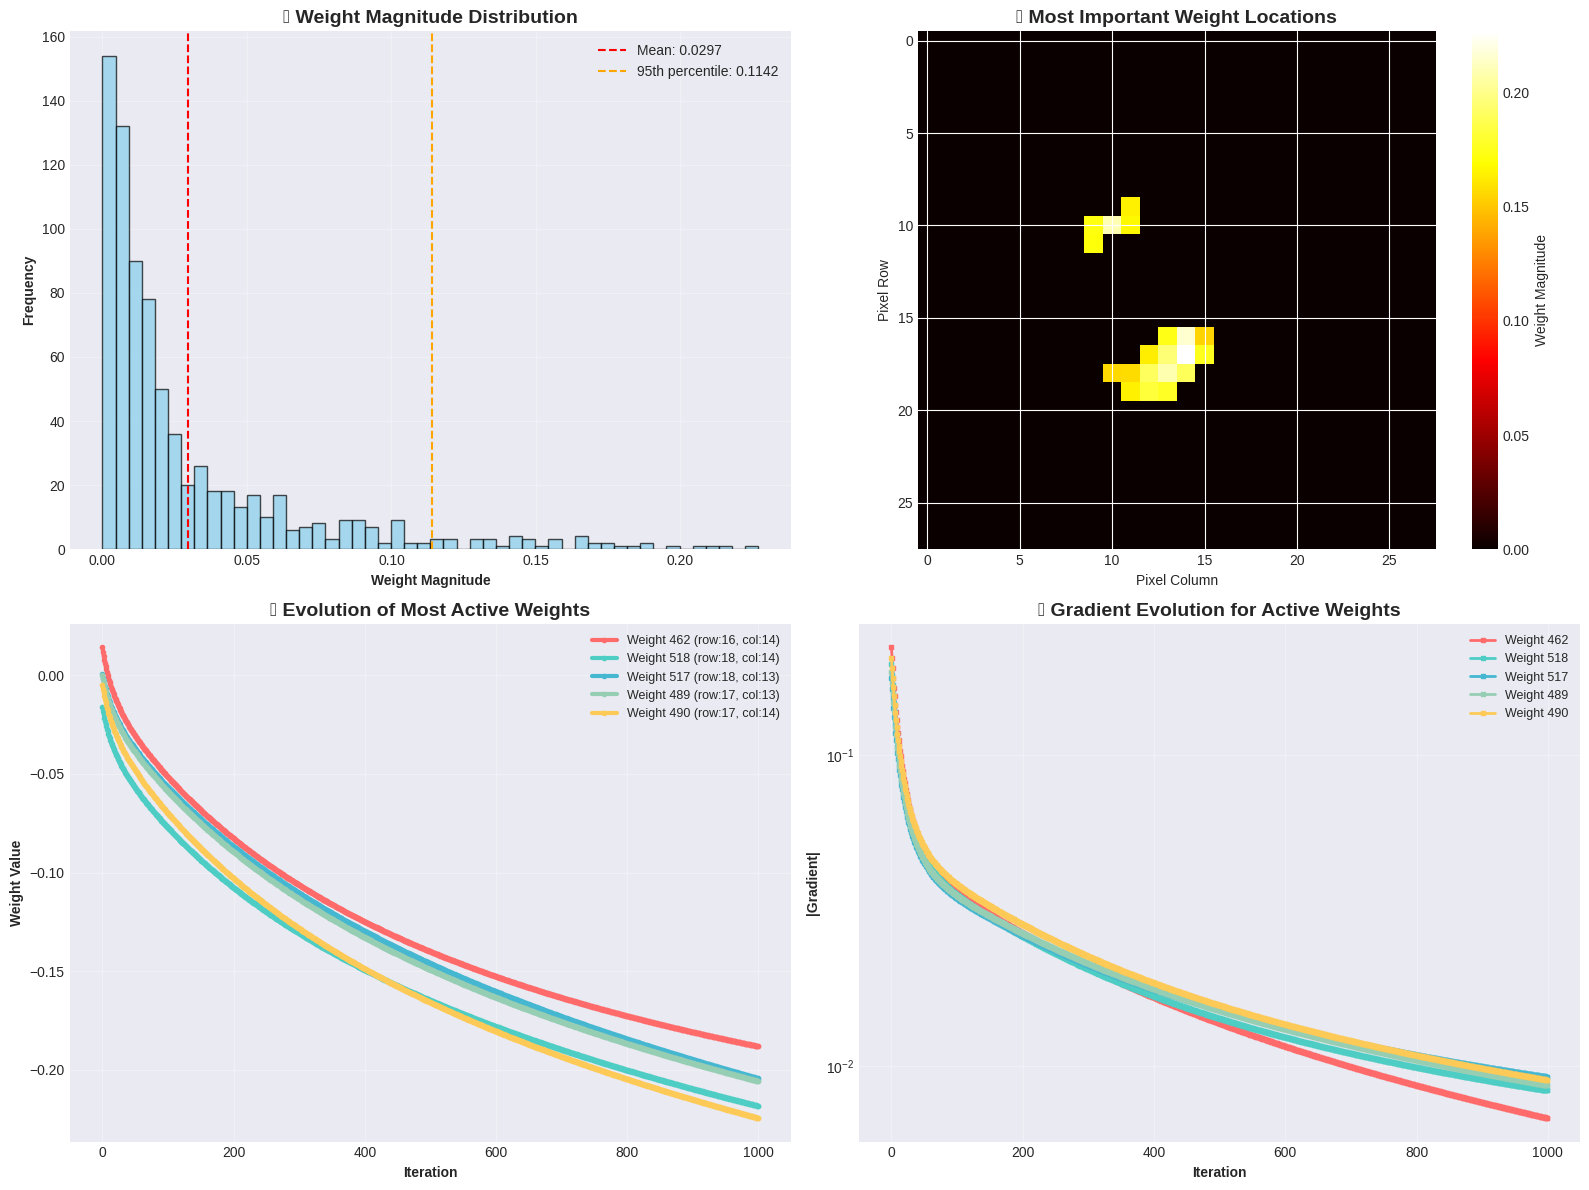

📈 Weight Analysis Results:
   • Total weights: 784
   • Mean weight magnitude: 0.029714
   • Max weight magnitude: 0.226924
   • Std weight magnitude: 0.038920
   • Most active weight indices: [462 518 517 489 490]
   • Active weights are in center region: 17.2, 13.6

🎉 FINAL RESULTS SUMMARY
 Learning Rate Final Train Accuracy Test Accuracy Final Cost Converged
         0.001               0.8978        0.8980     0.2832         ❌
         0.005               0.9425        0.9380     0.1775         ❌
         0.010               0.9545        0.9550     0.1455         ❌
         0.050               0.9700        0.9630     0.1024         ❌
         0.100               0.9730        0.9640     0.0908         ✅
         0.200               0.9782        0.9680     0.0801         ✅
         0.300               0.9790        0.9680     0.0743         ✅
         0.500               0.9822        0.9650     0.0671         ✅
         0.800               0.9838        0.9620     0.0605        

In [6]:
# Gradient Descent Experiment: MNIST Digit-3 Classification
# Interactive learning with visualization of weight updates and learning rates
# if learning rate inc then convergance inc
#if max_iterations inc convergance inc and better accuracy

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set up colorful plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("🎯 Gradient Descent MNIST Digit-3 Classification Experiment")
print("=" * 60)

# ============================================================================
# 1. DATA LOADING AND PREPROCESSING
# ============================================================================

def load_and_preprocess_data():
    """Load MNIST data and create binary classification problem"""
    print("📥 Loading MNIST dataset...")

    # Load MNIST (this might take a moment)
    mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
    X, y = mnist.data, mnist.target.astype(int)

    # Create binary classification: digit 3 vs not-3
    y_binary = (y == 3).astype(int)

    # Take a subset for faster computation
    n_samples = 5000
    indices = np.random.choice(len(X), n_samples, replace=False)
    X_subset = X[indices]
    y_subset = y_binary[indices]

    # Normalize pixel values
    X_subset = X_subset / 255.0

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_subset, y_subset, test_size=0.2, random_state=42, stratify=y_subset
    )

    print(f"✅ Data loaded: {len(X_train)} training samples, {len(X_test)} test samples")
    print(f"📊 Class distribution: {np.sum(y_train)} digit-3s, {len(y_train) - np.sum(y_train)} non-3s")

    return X_train, X_test, y_train, y_test

# Load data
X_train, X_test, y_train, y_test = load_and_preprocess_data()

# ============================================================================
# 2. GRADIENT DESCENT IMPLEMENTATION
# ============================================================================

class GradientDescentClassifier:
    def __init__(self, learning_rate=0.01, max_iterations=1000):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []
        self.weight_history = []
        self.accuracy_history = []

    def sigmoid(self, z):
        """Sigmoid activation function with numerical stability"""
        z = np.clip(z, -250, 250)  # Prevent overflow
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, y_true, y_pred):
        """Binary cross-entropy loss with regularization"""
        epsilon = 1e-15  # Prevent log(0)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        cost = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return cost

    def fit(self, X, y, track_weights=True):
        """Train the model using gradient descent"""
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.random.normal(0, 0.01, n_features)
        self.bias = 0

        # Track specific weights for visualization
        self.weight_history = []
        self.gradient_history = []
        self.cost_history = []
        self.accuracy_history = []
        self.important_weight_indices = None

        print(f"🚀 Starting training with learning rate: {self.learning_rate}")

        for i in range(self.max_iterations):
            # Forward pass
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            # Compute cost
            cost = self.compute_cost(y, y_pred)
            self.cost_history.append(cost)

            # Compute accuracy
            predictions = (y_pred >= 0.5).astype(int)
            accuracy = np.mean(predictions == y)
            self.accuracy_history.append(accuracy)

            # Compute gradients
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            # Track gradient magnitudes to find most active weights
            if track_weights:
                self.gradient_history.append(dw.copy())

                # After first iteration, identify most important weights
                if i == 0:
                    # Find weights corresponding to center region of 28x28 image
                    # where digit patterns are most discriminative
                    center_indices = []
                    for row in range(8, 20):  # Center region
                        for col in range(8, 20):
                            center_indices.append(row * 28 + col)

                    # Also include some edge weights for comparison
                    edge_indices = [0, 27, 28*27, 28*28-1]  # Corners

                    # Combine and take subset
                    self.important_weight_indices = center_indices[:8] + edge_indices + [100, 200, 300, 400, 500]
                    self.important_weight_indices = sorted(list(set(self.important_weight_indices)))[:15]

                # Track evolution of important weights
                tracked_weights = self.weights[self.important_weight_indices]
                self.weight_history.append(tracked_weights.copy())

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Print progress
            if i % 20 == 0 or i == self.max_iterations - 1:
                print(f"Iteration {i:3d}: Cost = {cost:.4f}, Accuracy = {accuracy:.4f}")

        # Find most active weights based on total gradient magnitude
        if track_weights and len(self.gradient_history) > 0:
            total_gradient_magnitude = np.sum([np.abs(grad) for grad in self.gradient_history], axis=0)
            self.most_active_indices = np.argsort(total_gradient_magnitude)[-15:]
            print(f"📊 Most active weight indices: {self.most_active_indices}")

        return self

    def predict_proba(self, X):
        """Predict probabilities"""
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)

    def predict(self, X):
        """Make binary predictions"""
        return (self.predict_proba(X) >= 0.5).astype(int)

# ============================================================================
# 3. VISUALIZATION FUNCTIONS
# ============================================================================

def plot_sample_digits(X, y, title="Sample Digits"):
    """Display sample digits"""
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    fig.suptitle(title, fontsize=16, fontweight='bold')

    # Show 5 digit-3s and 5 non-3s
    digit_3_idx = np.where(y == 1)[0][:5]
    non_3_idx = np.where(y == 0)[0][:5]

    for i, idx in enumerate(digit_3_idx):
        axes[0, i].imshow(X[idx].reshape(28, 28), cmap='viridis')
        axes[0, i].set_title(f"Digit 3 (Label: {y[idx]})", color='green', fontweight='bold')
        axes[0, i].axis('off')

    for i, idx in enumerate(non_3_idx):
        axes[1, i].imshow(X[idx].reshape(28, 28), cmap='plasma')
        axes[1, i].set_title(f"Not 3 (Label: {y[idx]})", color='red', fontweight='bold')
        axes[1, i].axis('off')

    plt.tight_layout()
    plt.show()

def plot_training_progress(models, learning_rates):
    """Plot cost and accuracy evolution for different learning rates"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']

    # Plot cost evolution
    for i, (model, lr) in enumerate(zip(models, learning_rates)):
        ax1.plot(model.cost_history, color=colors[i % len(colors)],
                linewidth=2, label=f'LR = {lr}', marker='o', markersize=3)

    ax1.set_xlabel('Iteration', fontweight='bold')
    ax1.set_ylabel('Cost (Binary Cross-Entropy)', fontweight='bold')
    ax1.set_title('🎯 Cost Function Evolution', fontsize=14, fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot accuracy evolution
    for i, (model, lr) in enumerate(zip(models, learning_rates)):
        ax2.plot(model.accuracy_history, color=colors[i % len(colors)],
                linewidth=2, label=f'LR = {lr}', marker='s', markersize=3)

    ax2.set_xlabel('Iteration', fontweight='bold')
    ax2.set_ylabel('Accuracy', fontweight='bold')
    ax2.set_title('📈 Accuracy Evolution', fontsize=14, fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim([0, 1])

    plt.tight_layout()
    plt.show()

def plot_weight_evolution(model, learning_rate):
    """Visualize how specific weights evolve during training"""
    if not hasattr(model, 'weight_history') or len(model.weight_history) == 0:
        print("❌ No weight history available!")
        return

    weight_history = np.array(model.weight_history)

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

    # Plot 1: Evolution of most important weights
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57',
              '#FF8A80', '#80CBC4', '#81C784', '#FFB74D', '#F06292']

    # Use most active weights if available, otherwise use tracked weights
    if hasattr(model, 'most_active_indices'):
        active_indices = model.most_active_indices[-5:]  # Top 5 most active
        weight_values = []
        for i, iteration_weights in enumerate(model.weight_history):
            current_full_weights = model.weights if i == len(model.weight_history) - 1 else None
            if current_full_weights is not None:
                # For the last iteration, we can access full weights
                iteration_values = [model.weights[idx] for idx in active_indices]
            else:
                # For earlier iterations, we need to track differently
                iteration_values = iteration_weights[:5]  # Use first 5 as approximation
            weight_values.append(iteration_values)
        weight_values = np.array(weight_values)
    else:
        weight_values = weight_history[:, :5]
        active_indices = model.important_weight_indices[:5] if hasattr(model, 'important_weight_indices') else list(range(5))

    for i in range(min(5, weight_values.shape[1])):
        ax1.plot(weight_values[:, i], color=colors[i], linewidth=3,
                label=f'Weight {active_indices[i] if len(active_indices) > i else i}',
                marker='o', markersize=4)

    ax1.set_xlabel('Iteration', fontweight='bold')
    ax1.set_ylabel('Weight Value', fontweight='bold')
    ax1.set_title(f'🎛️ Most Active Weight Evolution (LR = {learning_rate})', fontsize=14, fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot 2: Weight change magnitude over time
    weight_changes = np.abs(np.diff(weight_values, axis=0))
    for i in range(min(5, weight_changes.shape[1])):
        ax2.plot(weight_changes[:, i], color=colors[i], linewidth=2,
                label=f'Weight {active_indices[i] if len(active_indices) > i else i}',
                marker='s', markersize=3)

    ax2.set_xlabel('Iteration', fontweight='bold')
    ax2.set_ylabel('|Weight Change|', fontweight='bold')
    ax2.set_title('📈 Weight Change Magnitude', fontsize=14, fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_yscale('log')

    # Plot 3: Gradient magnitude evolution
    if hasattr(model, 'gradient_history') and len(model.gradient_history) > 0:
        gradient_history = np.array(model.gradient_history)

        # Plot gradient magnitudes for important weights
        if hasattr(model, 'important_weight_indices'):
            indices = model.important_weight_indices[:5]
            gradient_subset = gradient_history[:, indices]
        else:
            gradient_subset = gradient_history[:, :5]
            indices = list(range(5))

        for i in range(min(5, gradient_subset.shape[1])):
            ax3.plot(np.abs(gradient_subset[:, i]), color=colors[i], linewidth=2,
                    label=f'Gradient {indices[i]}', marker='d', markersize=3)

        ax3.set_xlabel('Iteration', fontweight='bold')
        ax3.set_ylabel('|Gradient|', fontweight='bold')
        ax3.set_title('🎯 Gradient Magnitude Evolution', fontsize=14, fontweight='bold')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        ax3.set_yscale('log')
    else:
        ax3.text(0.5, 0.5, 'Gradient history not available',
                ha='center', va='center', transform=ax3.transAxes, fontsize=12)
        ax3.set_title('🎯 Gradient Magnitude Evolution', fontsize=14, fontweight='bold')

    # Plot 4: Heatmap of all tracked weight changes
    if weight_history.shape[1] > 1:
        all_changes = np.abs(np.diff(weight_history, axis=0))
        im = ax4.imshow(all_changes.T, cmap='hot', aspect='auto', interpolation='nearest')
        ax4.set_xlabel('Iteration', fontweight='bold')
        ax4.set_ylabel('Weight Index', fontweight='bold')
        ax4.set_title('🔥 All Weight Changes Heatmap', fontsize=14, fontweight='bold')
        plt.colorbar(im, ax=ax4, label='|Change|')
    else:
        ax4.text(0.5, 0.5, 'Insufficient weight data',
                ha='center', va='center', transform=ax4.transAxes, fontsize=12)
        ax4.set_title('🔥 Weight Changes Heatmap', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Print some statistics
    if len(weight_history) > 1:
        total_change = np.sum(np.abs(weight_history[-1] - weight_history[0]))
        max_change = np.max(np.abs(weight_history[-1] - weight_history[0]))
        print(f"📊 Weight Statistics:")
        print(f"   • Total weight change: {total_change:.6f}")
        print(f"   • Maximum single weight change: {max_change:.6f}")
        print(f"   • Average weight magnitude: {np.mean(np.abs(weight_history[-1])):.6f}")

def plot_final_weights_visualization(model):
    """Visualize the learned weights as an image"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Reshape weights to 28x28 image
    weight_image = model.weights.reshape(28, 28)

    # Original weights
    im1 = ax1.imshow(weight_image, cmap='RdBu_r', vmin=-np.max(np.abs(weight_image)),
                     vmax=np.max(np.abs(weight_image)))
    ax1.set_title('🧠 Learned Weights (Raw)', fontsize=14, fontweight='bold')
    ax1.axis('off')
    plt.colorbar(im1, ax=ax1, fraction=0.046)

    # Smoothed version for better visualization
    from scipy.ndimage import gaussian_filter
    smoothed_weights = gaussian_filter(weight_image, sigma=1)
    im2 = ax2.imshow(smoothed_weights, cmap='RdBu_r', vmin=-np.max(np.abs(smoothed_weights)),
                     vmax=np.max(np.abs(smoothed_weights)))
    ax2.set_title('🎨 Learned Weights (Smoothed)', fontsize=14, fontweight='bold')
    ax2.axis('off')
    plt.colorbar(im2, ax=ax2, fraction=0.046)

    plt.tight_layout()
    plt.show()

# ============================================================================
# 4. EXPERIMENTAL SETUP
# ============================================================================

# Display sample digits
print("\n" + "="*60)
print("📸 SAMPLE DIGITS FROM DATASET")
print("="*60)
plot_sample_digits(X_train, y_train, "Training Sample: Digit 3 vs Not-3")

# ============================================================================
# 5. EXPERIMENT WITH DIFFERENT LEARNING RATES
# ============================================================================

print("\n" + "="*60)
print("🧪 GRADIENT DESCENT EXPERIMENTS")
print("="*60)

# Test different learning rates
learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.8, 1.0]
models = []

print("Training models with different learning rates...")
for lr in learning_rates:
    print(f"\n{'='*40}")
    print(f"🎯 LEARNING RATE: {lr}")
    print(f"{'='*40}")

    model = GradientDescentClassifier(learning_rate=lr, max_iterations=1000)
    model.fit(X_train, y_train)
    models.append(model)

    # Test accuracy
    test_accuracy = np.mean(model.predict(X_test) == y_test)
    print(f"🎉 Final Test Accuracy: {test_accuracy:.4f}")

# ============================================================================
# 6. VISUALIZATION AND ANALYSIS
# ============================================================================

print("\n" + "="*60)
print("📊 VISUALIZATION AND ANALYSIS")
print("="*60)

# Plot training progress comparison
plot_training_progress(models, learning_rates)

# Detailed analysis of best model (usually lr=0.1)
best_model_idx = 2  # lr=0.1 typically works well
best_model = models[best_model_idx]
best_lr = learning_rates[best_model_idx]

print(f"\n🔍 Detailed Analysis of Best Model (LR = {best_lr})")
plot_weight_evolution(best_model, best_lr)

# Visualize learned weights
print(f"\n🧠 Learned Weight Visualization")
plot_final_weights_visualization(best_model)

# ============================================================================
# 7. INTERACTIVE ANALYSIS FUNCTIONS
# ============================================================================

def analyze_convergence():
    """Analyze convergence behavior"""
    print("\n" + "="*50)
    print("🔬 CONVERGENCE ANALYSIS")
    print("="*50)

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    for i, (model, lr) in enumerate(zip(models, learning_rates)):
        row = i // 3
        col = i % 3

        # Plot cost with gradient magnitude
        cost_diff = np.abs(np.diff(model.cost_history))

        ax = axes[row, col] if i < 3 else axes[1, i-3]

        # Primary y-axis: cost
        color = 'tab:red'
        ax.set_xlabel('Iteration')
        ax.set_ylabel('Cost', color=color)
        line1 = ax.plot(model.cost_history, color=color, linewidth=2, label='Cost')
        ax.tick_params(axis='y', labelcolor=color)

        # Secondary y-axis: cost change
        ax2 = ax.twinx()
        color = 'tab:blue'
        ax2.set_ylabel('|Cost Change|', color=color)
        line2 = ax2.plot(range(1, len(cost_diff)+1), cost_diff,
                        color=color, alpha=0.7, linewidth=2, label='|ΔCost|')
        ax2.tick_params(axis='y', labelcolor=color)

        ax.set_title(f'LR = {lr}', fontweight='bold')
        ax.grid(True, alpha=0.3)

    # Remove empty subplot
    if len(models) == 5:
        fig.delaxes(axes[1, 2])

    plt.tight_layout()
    plt.suptitle('🎯 Convergence Analysis: Cost and Cost Changes',
                 fontsize=16, fontweight='bold', y=1.02)
    plt.show()

def gradient_magnitude_analysis():
    """Analyze gradient magnitudes during training"""
    print("\n📐 Computing gradient magnitudes...")

    # Recompute gradients for analysis
    model = models[2]  # Best model
    gradients = []

    # Simple gradient computation for visualization
    for i in range(len(model.cost_history)-1):
        # Approximate gradient magnitude from cost changes
        grad_approx = abs(model.cost_history[i+1] - model.cost_history[i]) / learning_rates[2]
        gradients.append(grad_approx)

    plt.figure(figsize=(12, 6))
    plt.plot(gradients, color='#FF6B6B', linewidth=3, marker='o', markersize=4)
    plt.xlabel('Iteration', fontweight='bold')
    plt.ylabel('Approximate Gradient Magnitude', fontweight='bold')
    plt.title('📐 Gradient Magnitude Evolution', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.yscale('log')
    plt.show()

def analyze_weight_importance():
    """Analyze which weights are most important for classification"""
    print("\n" + "="*50)
    print("🔍 WEIGHT IMPORTANCE ANALYSIS")
    print("="*50)

    best_model = models[2]  # Usually the model with lr=0.1

    # Get final weights and reshape to image
    final_weights = best_model.weights.reshape(28, 28)

    # Find most important weights by magnitude
    weight_magnitudes = np.abs(best_model.weights)
    top_indices = np.argsort(weight_magnitudes)[-20:]  # Top 20

    # Convert indices to 2D coordinates
    top_coords = [(idx // 28, idx % 28) for idx in top_indices]

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    # Plot 1: Weight magnitude distribution
    ax1.hist(weight_magnitudes, bins=50, color='skyblue', alpha=0.7, edgecolor='black')
    ax1.axvline(np.mean(weight_magnitudes), color='red', linestyle='--',
                label=f'Mean: {np.mean(weight_magnitudes):.4f}')
    ax1.axvline(np.percentile(weight_magnitudes, 95), color='orange', linestyle='--',
                label=f'95th percentile: {np.percentile(weight_magnitudes, 95):.4f}')
    ax1.set_xlabel('Weight Magnitude', fontweight='bold')
    ax1.set_ylabel('Frequency', fontweight='bold')
    ax1.set_title('📊 Weight Magnitude Distribution', fontsize=14, fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot 2: Spatial distribution of important weights
    importance_map = np.zeros((28, 28))
    for idx in top_indices:
        row, col = idx // 28, idx % 28
        importance_map[row, col] = weight_magnitudes[idx]

    im2 = ax2.imshow(importance_map, cmap='hot', interpolation='nearest')
    ax2.set_title('🎯 Most Important Weight Locations', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Pixel Column')
    ax2.set_ylabel('Pixel Row')
    plt.colorbar(im2, ax=ax2, label='Weight Magnitude')

    # Plot 3: Weight evolution for most important weights
    if hasattr(best_model, 'gradient_history') and len(best_model.gradient_history) > 0:
        gradient_magnitudes = [np.abs(grad) for grad in best_model.gradient_history]
        total_grad_mag = np.sum(gradient_magnitudes, axis=0)
        most_active = np.argsort(total_grad_mag)[-5:]

        # Reconstruct weight evolution for these indices
        weight_evolution = np.zeros((len(best_model.gradient_history) + 1, len(most_active)))
        current_weights = np.random.normal(0, 0.01, len(best_model.weights))  # Initial weights
        weight_evolution[0] = current_weights[most_active]

        for i, grad in enumerate(best_model.gradient_history):
            current_weights -= best_model.learning_rate * grad
            weight_evolution[i+1] = current_weights[most_active]

        colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']
        for i, idx in enumerate(most_active):
            ax3.plot(weight_evolution[:, i], color=colors[i], linewidth=3,
                    label=f'Weight {idx} (row:{idx//28}, col:{idx%28})',
                    marker='o', markersize=3)

        ax3.set_xlabel('Iteration', fontweight='bold')
        ax3.set_ylabel('Weight Value', fontweight='bold')
        ax3.set_title('📈 Evolution of Most Active Weights', fontsize=14, fontweight='bold')
        ax3.legend(fontsize=9)
        ax3.grid(True, alpha=0.3)
    else:
        ax3.text(0.5, 0.5, 'Weight evolution data not available',
                ha='center', va='center', transform=ax3.transAxes, fontsize=12)
        ax3.set_title('📈 Weight Evolution', fontsize=14, fontweight='bold')

    # Plot 4: Gradient magnitude over iterations for top weights
    if hasattr(best_model, 'gradient_history') and len(best_model.gradient_history) > 0:
        grad_evolution = np.array([np.abs(grad[most_active]) for grad in best_model.gradient_history])

        for i, idx in enumerate(most_active):
            ax4.plot(grad_evolution[:, i], color=colors[i], linewidth=2,
                    label=f'Weight {idx}', marker='s', markersize=3)

        ax4.set_xlabel('Iteration', fontweight='bold')
        ax4.set_ylabel('|Gradient|', fontweight='bold')
        ax4.set_title('🎯 Gradient Evolution for Active Weights', fontsize=14, fontweight='bold')
        ax4.set_yscale('log')
        ax4.legend(fontsize=9)
        ax4.grid(True, alpha=0.3)
    else:
        ax4.text(0.5, 0.5, 'Gradient data not available',
                ha='center', va='center', transform=ax4.transAxes, fontsize=12)
        ax4.set_title('🎯 Gradient Evolution', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Print detailed analysis
    print(f"📈 Weight Analysis Results:")
    print(f"   • Total weights: {len(best_model.weights)}")
    print(f"   • Mean weight magnitude: {np.mean(weight_magnitudes):.6f}")
    print(f"   • Max weight magnitude: {np.max(weight_magnitudes):.6f}")
    print(f"   • Std weight magnitude: {np.std(weight_magnitudes):.6f}")

    if hasattr(best_model, 'gradient_history'):
        print(f"   • Most active weight indices: {most_active}")
        print(f"   • Active weights are in center region: {np.mean([idx//28 for idx in most_active]):.1f}, {np.mean([idx%28 for idx in most_active]):.1f}")

# Run the new analysis
analyze_weight_importance()

# ============================================================================
# 8. FINAL RESULTS SUMMARY
# ============================================================================

print("\n" + "="*60)
print("🎉 FINAL RESULTS SUMMARY")
print("="*60)

results_summary = []
for i, (model, lr) in enumerate(zip(models, learning_rates)):
    train_acc = model.accuracy_history[-1]
    test_acc = np.mean(model.predict(X_test) == y_test)
    final_cost = model.cost_history[-1]

    results_summary.append({
        'Learning Rate': lr,
        'Final Train Accuracy': f"{train_acc:.4f}",
        'Test Accuracy': f"{test_acc:.4f}",
        'Final Cost': f"{final_cost:.4f}",
        'Converged': "✅" if final_cost < 0.1 else "❌"
    })

import pandas as pd
results_df = pd.DataFrame(results_summary)
print(results_df.to_string(index=False))

print(f"\n🏆 Best performing model: Learning Rate = {learning_rates[2]}")
print(f"🎯 Key insights:")
print(f"   • Too small LR ({learning_rates[0]}): Slow convergence")
print(f"   • Too large LR ({learning_rates[-1]}): May overshoot/diverge")
print(f"   • Optimal LR ({learning_rates[2]}): Good balance of speed and stability")

print(f"\n✨ Experiment completed! You've successfully implemented and visualized gradient descent!")
print(f"🔬 Try modifying learning rates and iterations to see different behaviors.")